# Assignment 3(due on 11/22)

## Student:郑各希（12332312），Gtihub：DaWaXiaoWa
## 批改人：张鹏


## 得分：62/60

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import netCDF4
import xarray as xr
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif']='Times New Roman'
plt.rcParams['font.size']=16

## 1. Niño 3.4 index

In [3]:
#第一大题
Nino= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
Nino

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
#1.1
Nino_34=Nino.sel(lon=slice(190,240),lat=slice(-5,5))

In [5]:
climatology=Nino_34.groupby('time.month').mean(dim='time')

In [6]:
#计算所有异常值
anomalies=Nino_34.groupby('time.month')-climatology
anomalies

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time, lat, lon) float32 -0.4316 -0.4185 -0.398 ... -0.3004 -0.1988

In [7]:
#根据报错学习到画二维图前需要先把Dataset转换成DataArray;从CSDN学习到了.rolling()方法;
#记录：.mean(['lat','lon'])才能得到区域内每个时间点的Nino异常值(time,month,lat,lon)
Nino_phe_anomalies=anomalies.rolling(time=3, center=True).mean()
Nino_phe_anomalies=Nino_phe_anomalies.mean(['lat','lon']).to_array().squeeze()

/tmp/ipykernel_168122/289276882.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(mdates.date2num(time_series[0] - delta), mdates.date2num(time_series[-1] + delta))
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because n

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

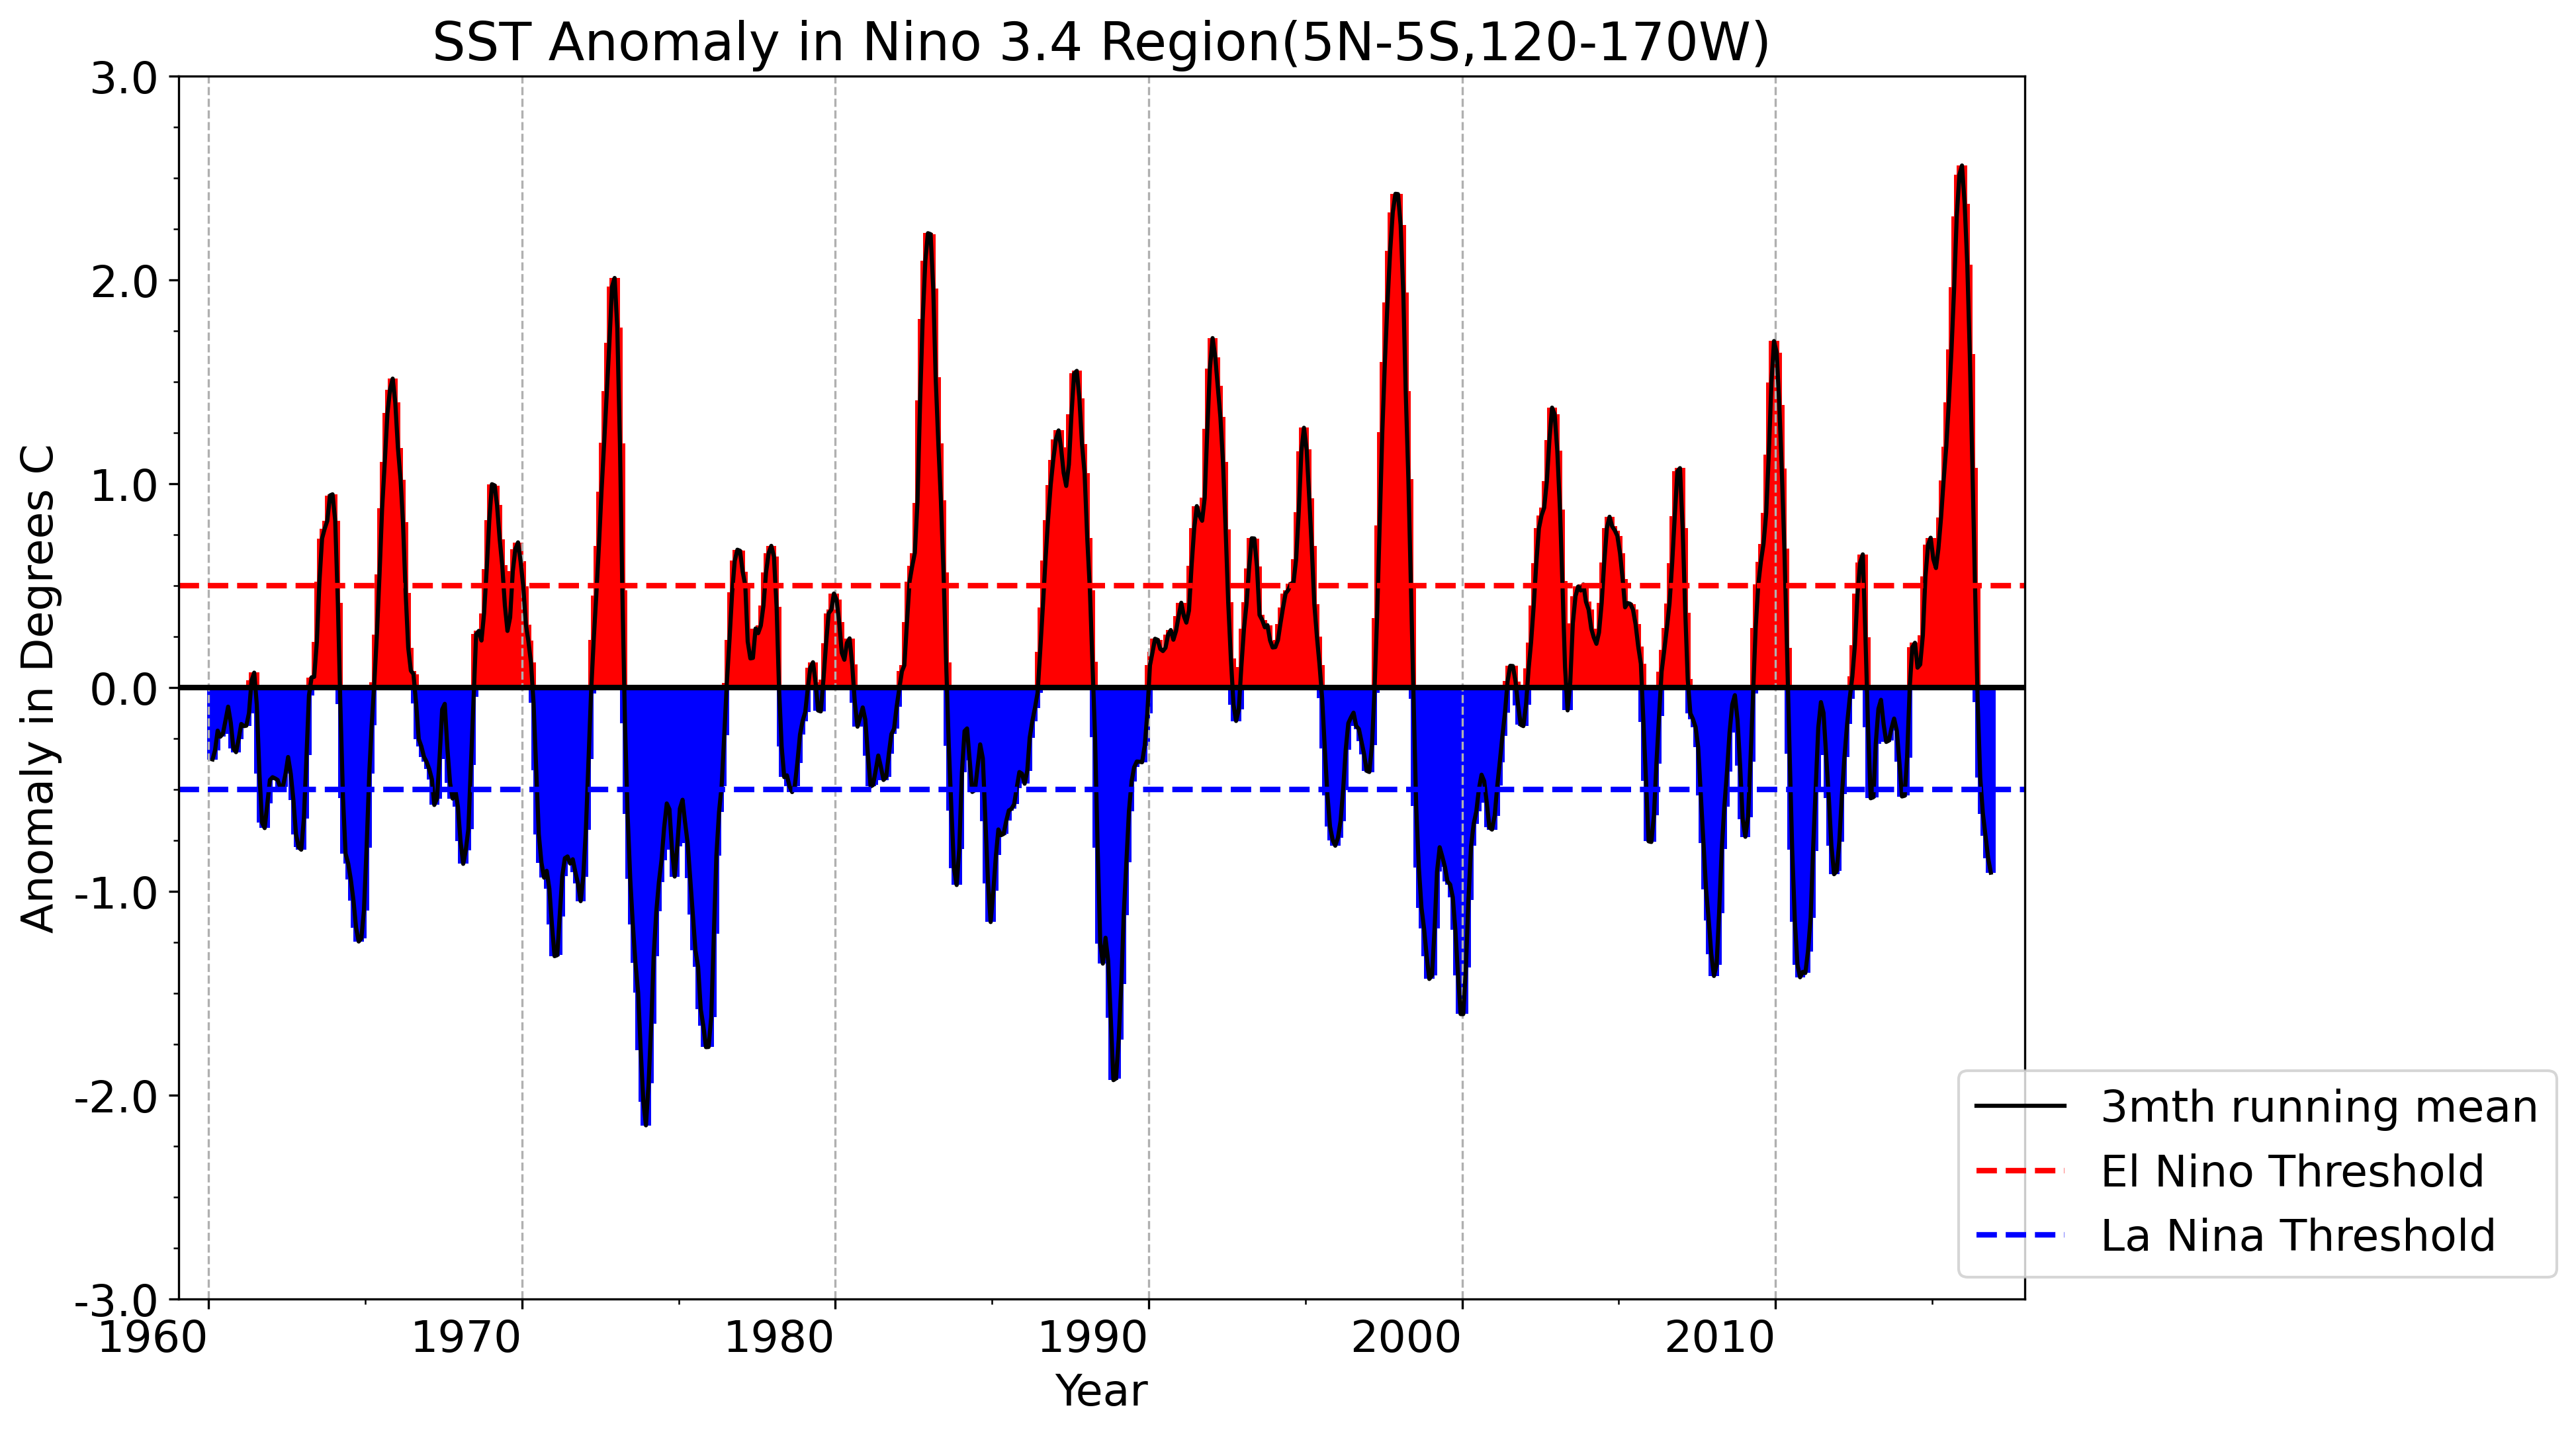

In [8]:
#1.2
fig,ax=plt.subplots(figsize=(12,8),dpi=300)
Nino_phe_anomalies.plot(color='black',linewidth=1.5,label='3mth running mean')
El_nino_thre,La_nina_thre=0.5,-0.5
#从matplotlib网站学习plt.axhline
plt.axhline(y=El_nino_thre,color='red',linestyle='--',label='El Nino Threshold',linewidth=2)
plt.axhline(y=La_nina_thre,color='blue',linestyle='--',label='La Nina Threshold',linewidth=2)
plt.axhline(y=0,color='black',linestyle='-',linewidth=2)
#将时间转换为标准形式
time_series=Nino_phe_anomalies['time'].to_series()
#设置直方图颜色
bar_colors=['red' if value>=0 else 'blue' for value in Nino_phe_anomalies]
plt.bar(time_series,Nino_phe_anomalies,color=bar_colors,zorder=0,width=120)
ax.set_xlabel('Year')
plt.xticks(rotation=0)
ax.set_ylabel('Anomaly in Degrees C')
#设置x轴范围，使前后两断都空出一定的范围
delta=pd.Timedelta(days=365)
ax.set_xlim(mdates.date2num(time_series[0] - delta), mdates.date2num(time_series[-1] + delta))
#设置主要刻度线和次要刻度线
ax.xaxis.set_major_locator(mdates.YearLocator(10)) 
ax.xaxis.set_minor_locator(mdates.YearLocator(5))
ax.set_ylim(-3.0,3.0)
ax.set_yticks(np.linspace(-3.0,3.0,7))
ax.set_yticks(np.arange(-3.0, 3.25, 0.25), minor=True)
ax.yaxis.set_major_formatter('{:.1f}'.format)
plt.title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)')
plt.legend(loc='lower right',bbox_to_anchor=(1.3,0))
plt.grid(axis='x',linestyle='--')

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容和详细的结果的分析。

### 得分：20/20
### --------------------------------------------------------------------------------------------

## 2. Earth’s energy budget

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

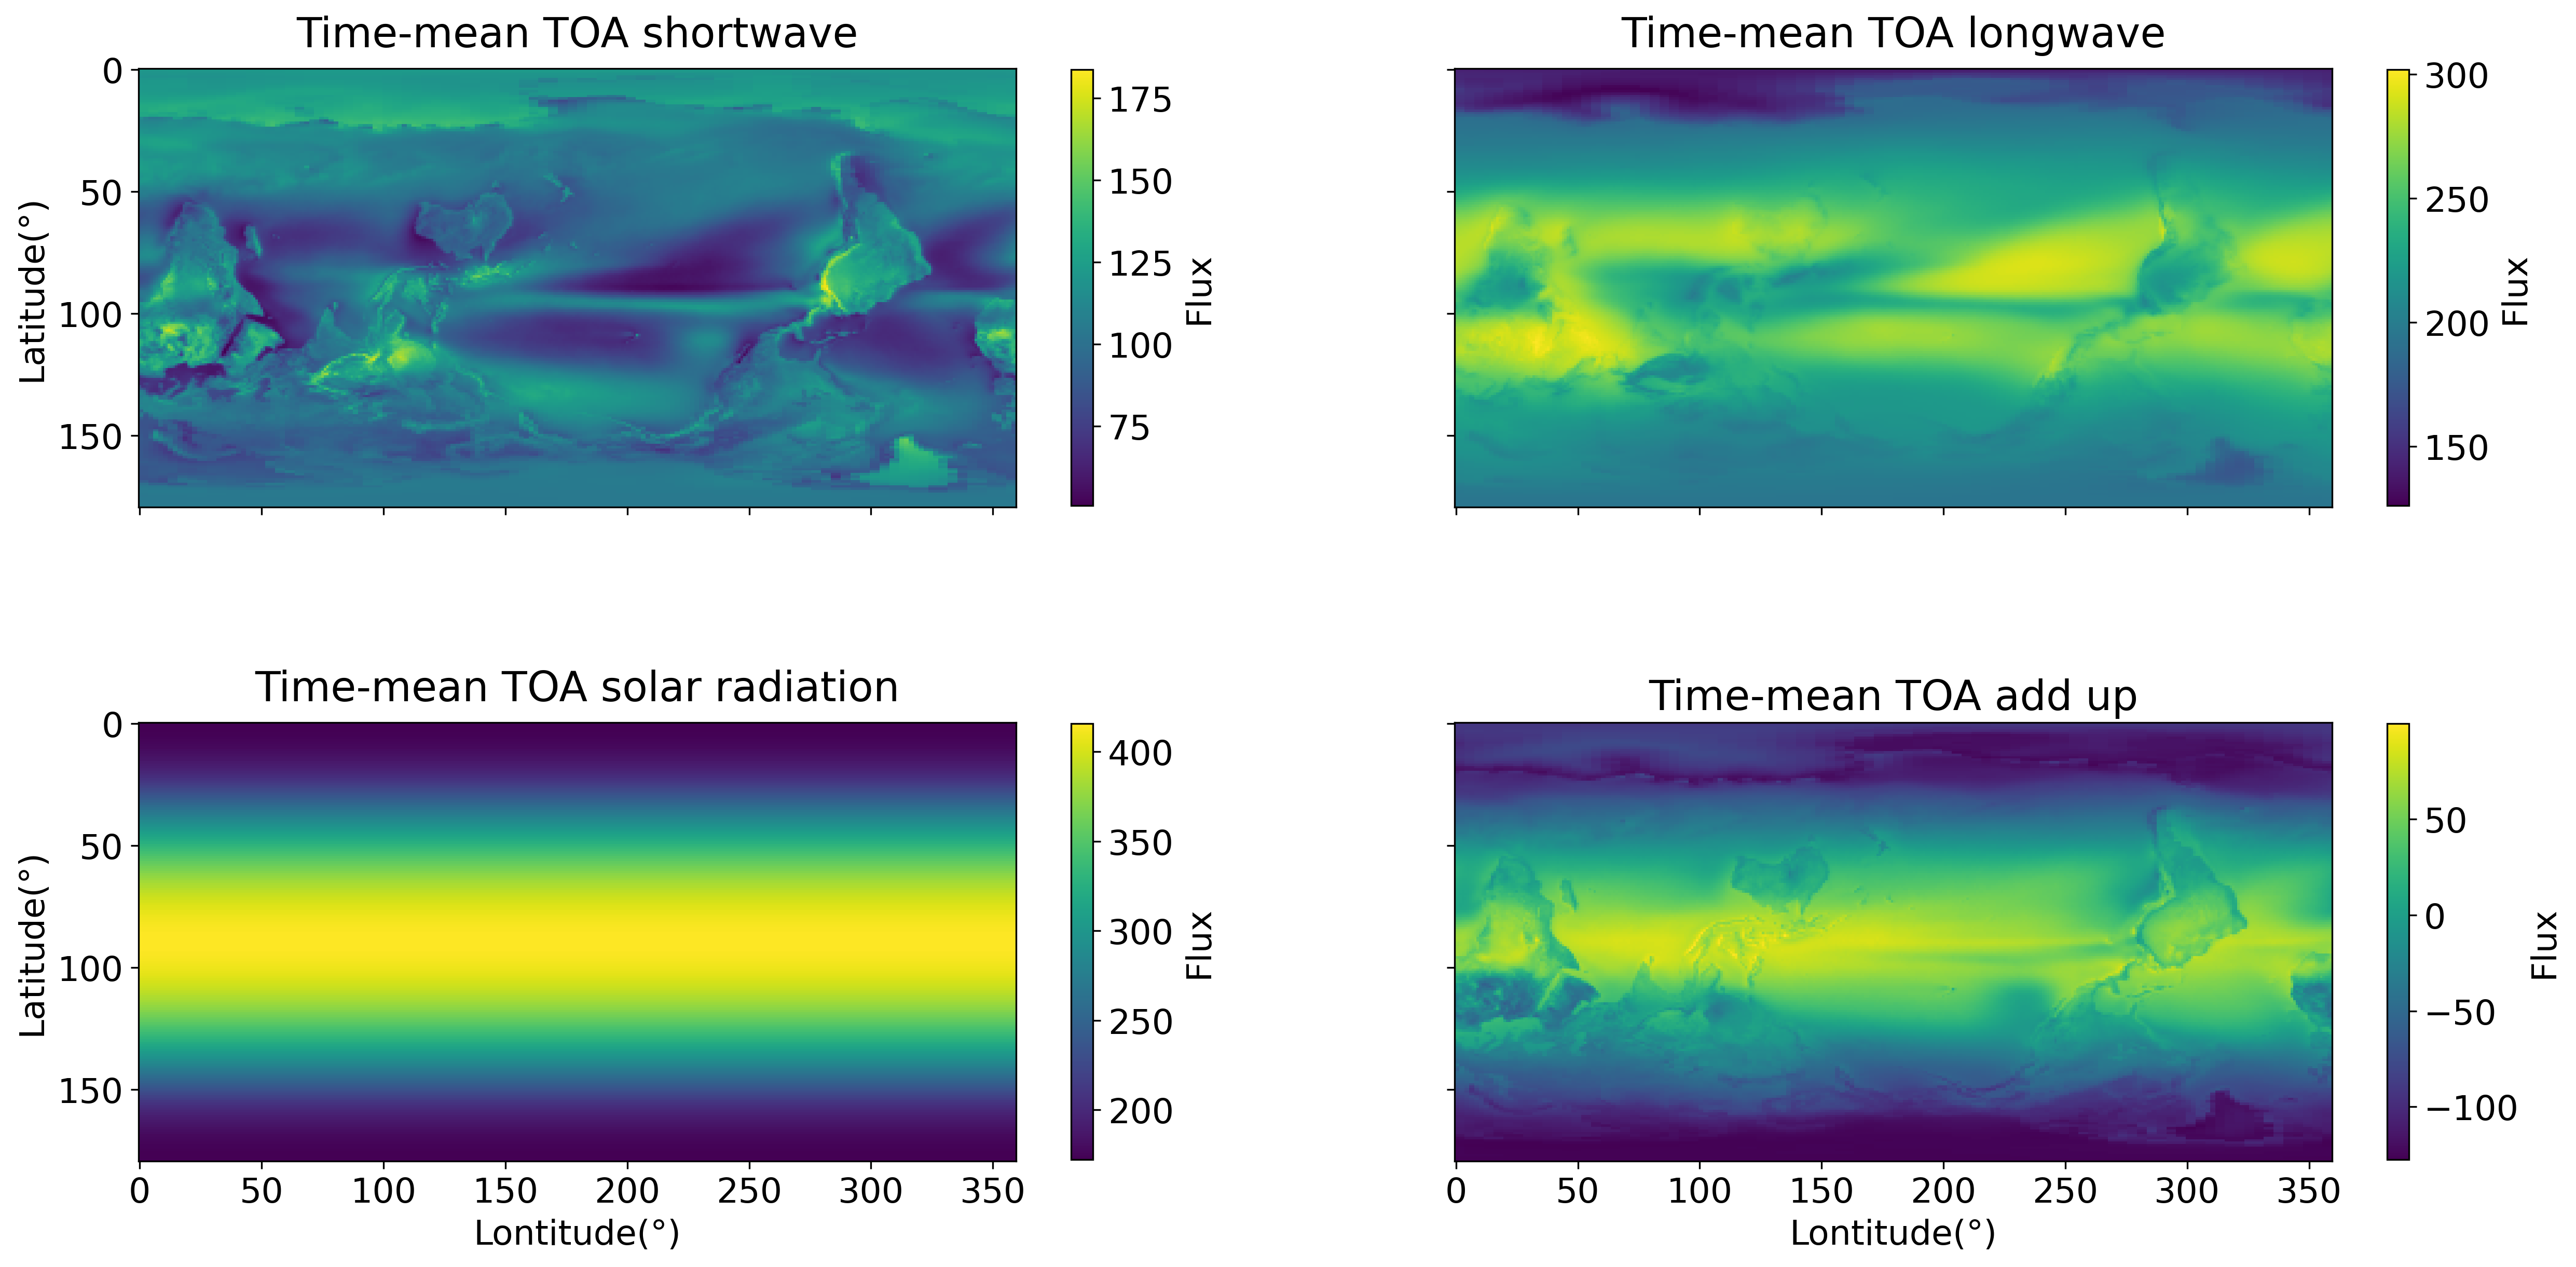

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

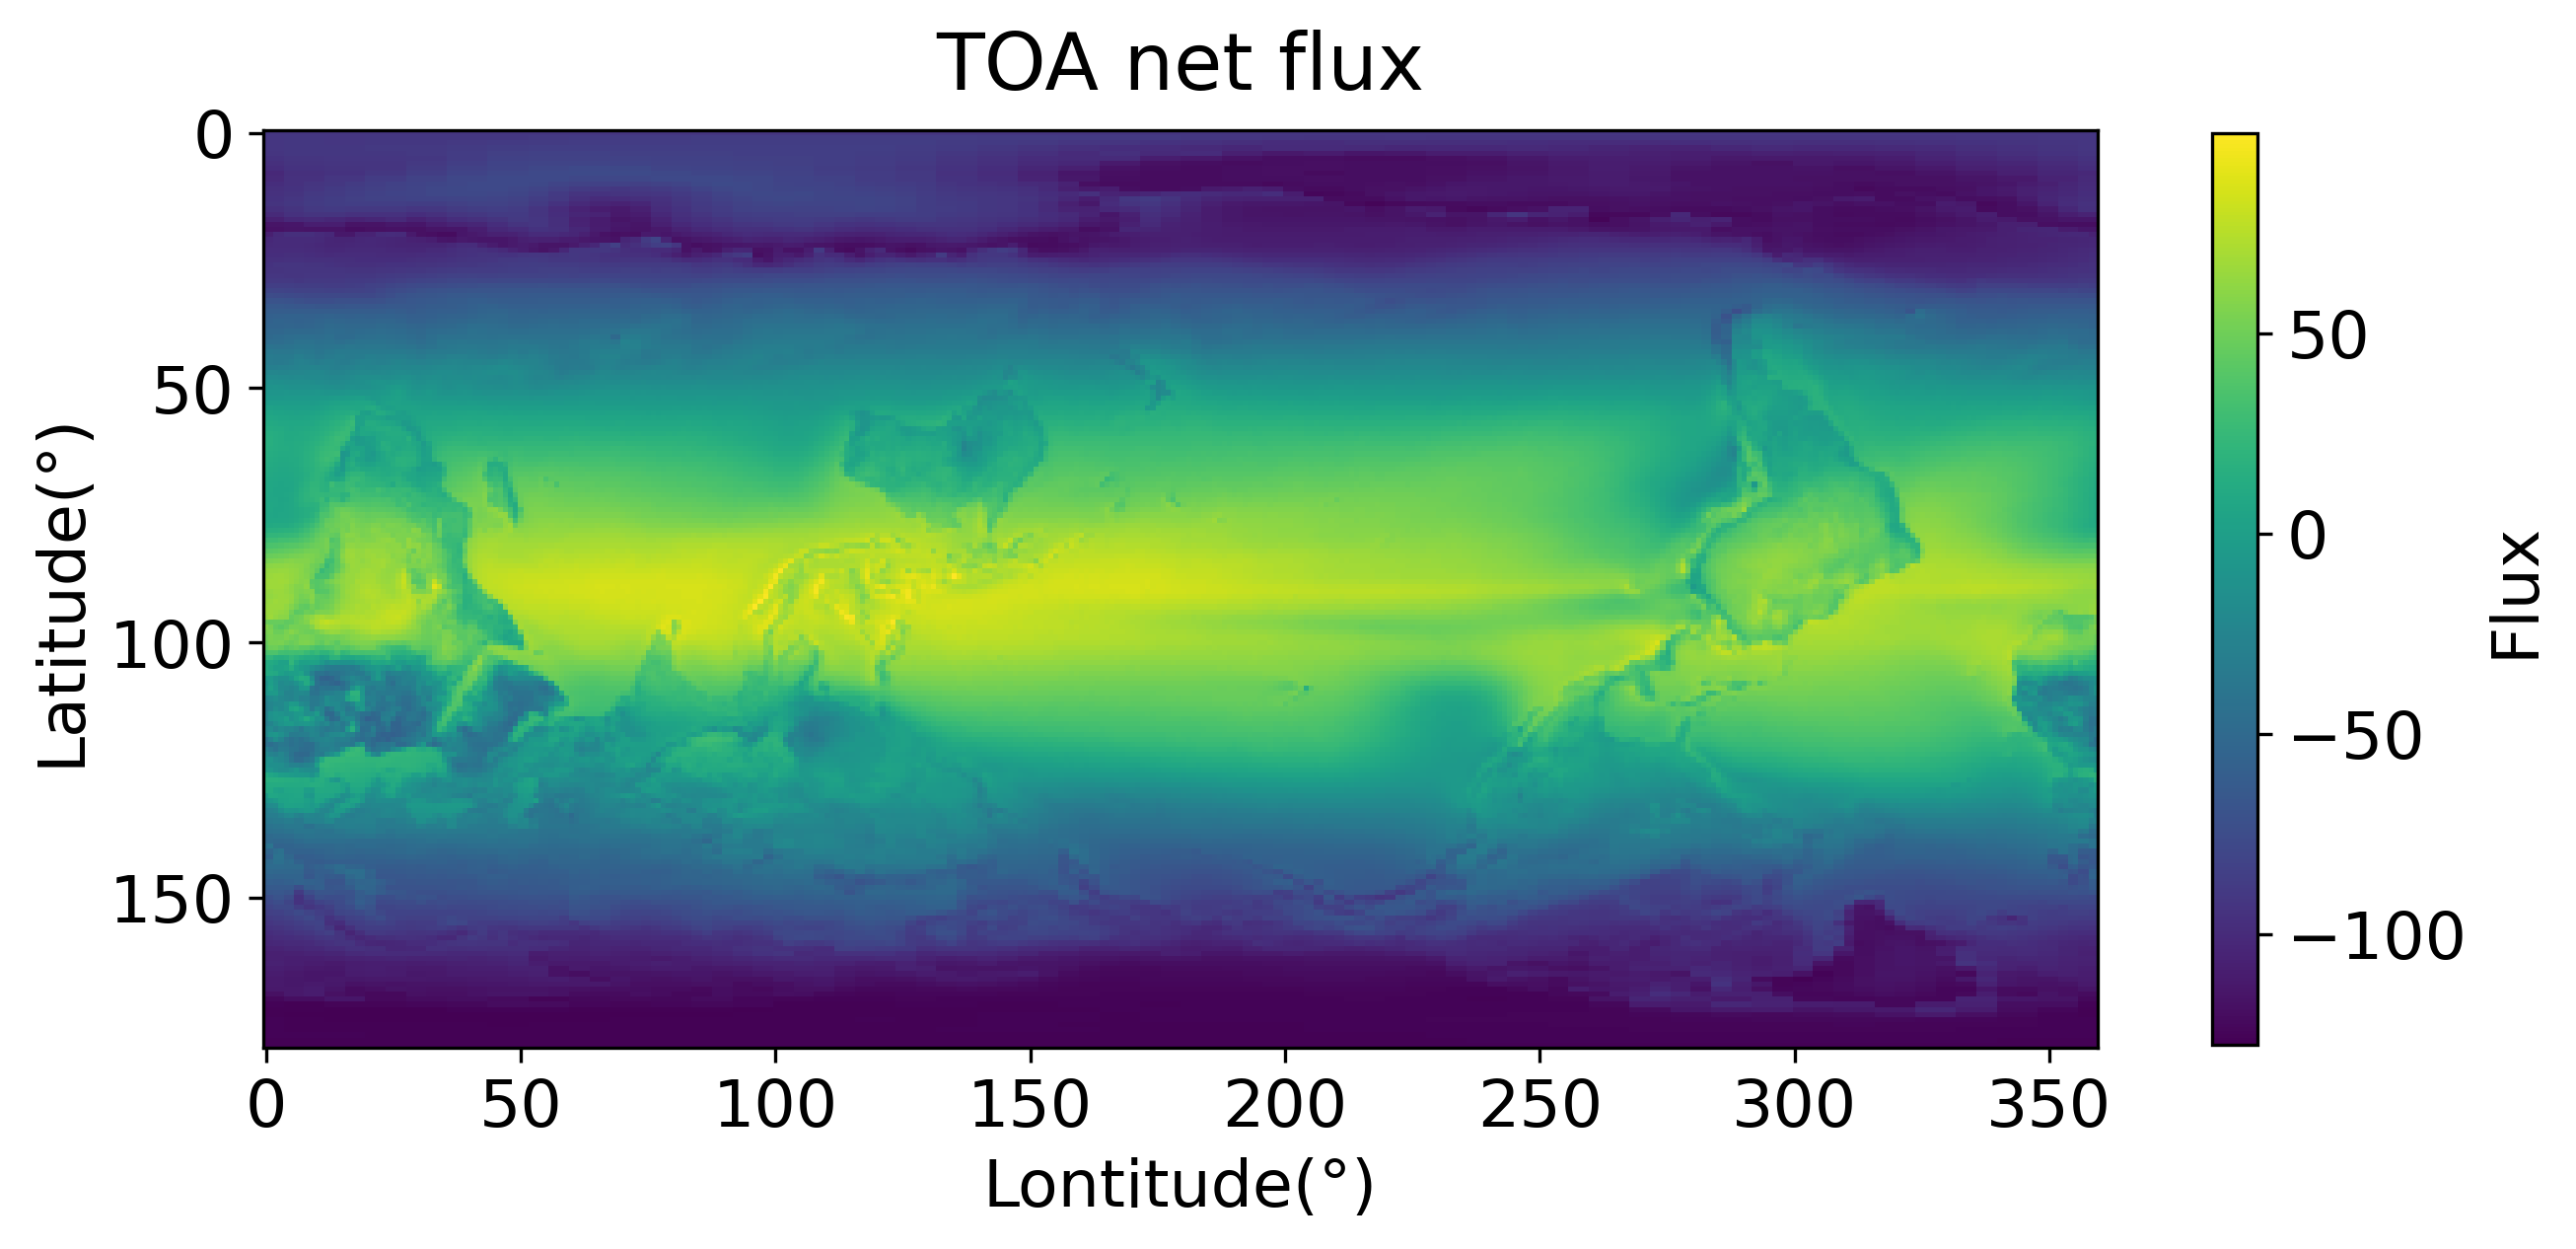

In [10]:
#第二大题
ear_ener_budg=xr.open_dataset("../CERES_EBAF-TOA_200003-201701.nc",engine="netcdf4")
#2.1
sw_all=ear_ener_budg.toa_sw_all_mon.mean(dim='time')
lw_all=ear_ener_budg.toa_lw_all_mon.mean(dim='time')
solar_ra=ear_ener_budg.solar_mon.mean(dim='time')
add_up=-ear_ener_budg.toa_sw_all_mon-ear_ener_budg.toa_lw_all_mon+ear_ener_budg.solar_mon
net_all=ear_ener_budg.toa_net_all_mon.mean(dim='time')
#设置子图，先画sw，lw，solar_ra, add_up
fig,axes=plt.subplots(2,2,figsize=(20,10),dpi=300,sharex=True,sharey=True)
im1=axes[0,0].imshow(sw_all)
axes[0,0].set_title('Time-mean TOA shortwave',pad=10)
axes[0,0].set_ylabel('Latitude(°)')
cbar1=fig.colorbar(im1, ax=axes[0, 0],shrink=0.8)
cbar1.set_label('Flux')
im2=axes[0,1].imshow(lw_all)
axes[0,1].set_title('Time-mean TOA longwave',pad=10)
im3=axes[1,0].imshow(solar_ra)
cbar2=fig.colorbar(im2, ax=axes[0,1],shrink=0.8)
cbar2.set_label('Flux')
axes[1,0].set_title('Time-mean TOA solar radiation',pad=10)
axes[1,0].set_xlabel('Lontitude(°)')
axes[1,0].set_ylabel('Latitude(°)')
cbar3=fig.colorbar(im3, ax=axes[1, 0],shrink=0.8)
cbar3.set_label('Flux')
im4=axes[1,1].imshow(add_up.mean(dim='time'))
axes[1,1].set_title('Time-mean TOA add up')
axes[1,1].set_xlabel('Lontitude(°)')
cbar4=fig.colorbar(im4, ax=axes[1, 1],shrink=0.8)
cbar4.set_label('Flux')
#画net flux
fig2,ax=plt.subplots(figsize=(10,10),dpi=300)
im2=ax.imshow(net_all)
ax.set_title('TOA net flux',pad=10)
ax.set_xlabel('Lontitude(°)')
ax.set_ylabel('Latitude(°)')
cbar5=fig2.colorbar(im2,ax=ax,shrink=0.4)
cbar5.set_label('Flux')

In [11]:
#2.2
# 根据经纬度计算每一个网格的表面积
unit_area=ear_ener_budg.solar_mon.mean(dim='time')*0+1  #让每一个网格先等于1
unit_area*=np.cos(np.deg2rad(ear_ener_budg['solar_mon']['lat'])) #乘以cos(纬度)
unit_area*=np.deg2rad(ear_ener_budg['solar_mon']['lon'] - ear_ener_budg['solar_mon']['lon'][0])#乘以经度差值的弧度值
unit_area*= 6371.009**2*1e6  #1km=1000m
# 计算整个地球的表面积
earth_area=unit_area.sum(dim=['lat', 'lon'])
# 计算每一个网格的平均时间辐射量 
incoming_solar=ear_ener_budg['solar_mon'].mean(dim='time')*unit_area
outgoing_longwave=ear_ener_budg['toa_lw_all_mon'].mean(dim='time')*unit_area
outgoing_shortwave=ear_ener_budg['toa_sw_all_mon'].mean(dim='time')*unit_area
# 计算整个地球的辐射量
total_solar=incoming_solar.sum(dim=['lat', 'lon'])
total_lw=outgoing_longwave.sum(dim=['lat', 'lon'])
total_sw=outgoing_shortwave.sum(dim=['lat', 'lon'])
# 输出并根据地球的表面积取平均
print('Incoming solar radiation:', float(total_solar.values/earth_area), 'W/m^2')
print('Outgoing longwave radiation:', float(total_lw.values/earth_area), 'W/m^2')
print('Outgoing shortwave radiation:', float(total_sw.values/earth_area), 'W/m^2')

Incoming solar radiation: 340.2850341796875 W/m^2
Outgoing longwave radiation: 240.4961395263672 W/m^2
Outgoing shortwave radiation: 98.21063232421875 W/m^2


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

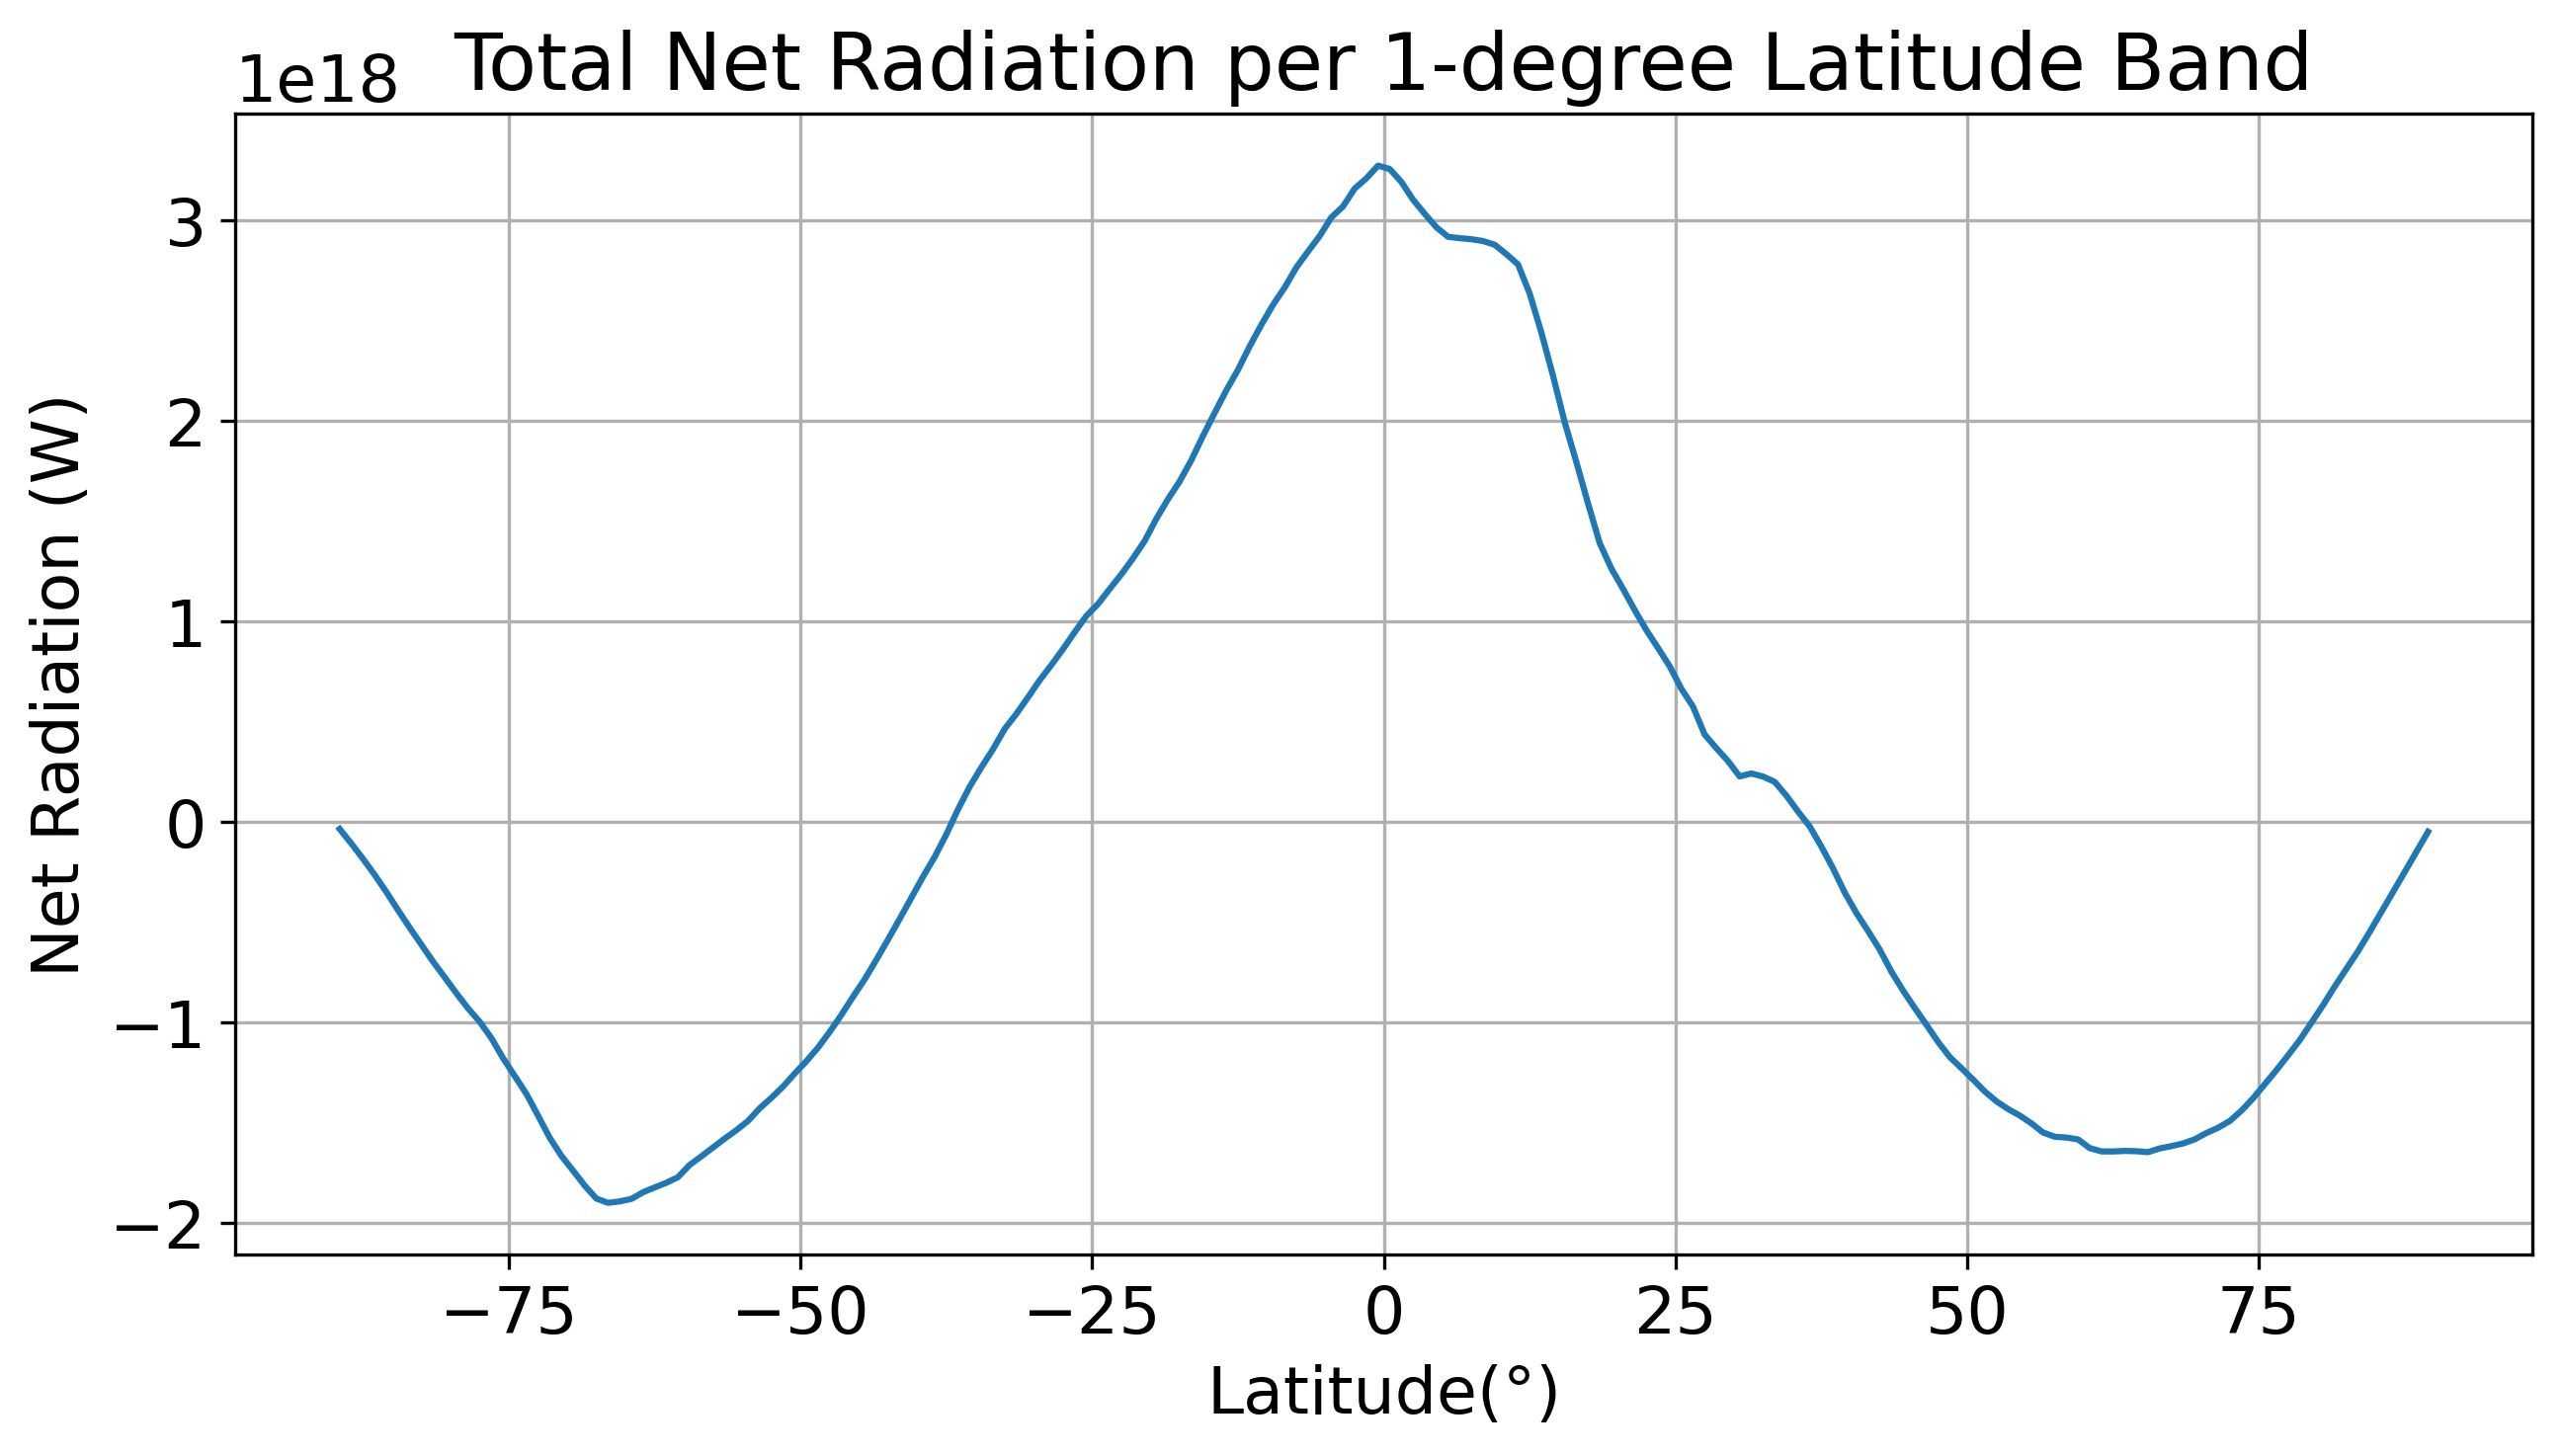

In [13]:
#2.3
#对时间和经度维度取平均，并乘以每一个纬度网格的面积以计算每一个纬度的辐射量
net_radiation=ear_ener_budg.solar_mon-ear_ener_budg.toa_sw_all_mon-ear_ener_budg.toa_lw_all_mon
net_radiation=net_radiation.mean(dim=['time','lon'])*unit_area.sum(dim=['lon'])
# 绘制总净辐射量
plt.figure(figsize=(10, 5),dpi=300)
plt.plot(net_radiation.lat, net_radiation)
plt.xlabel('Latitude(°)')
plt.ylabel('Net Radiation (W)')
plt.title('Total Net Radiation per 1-degree Latitude Band')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Latitude(°)')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman


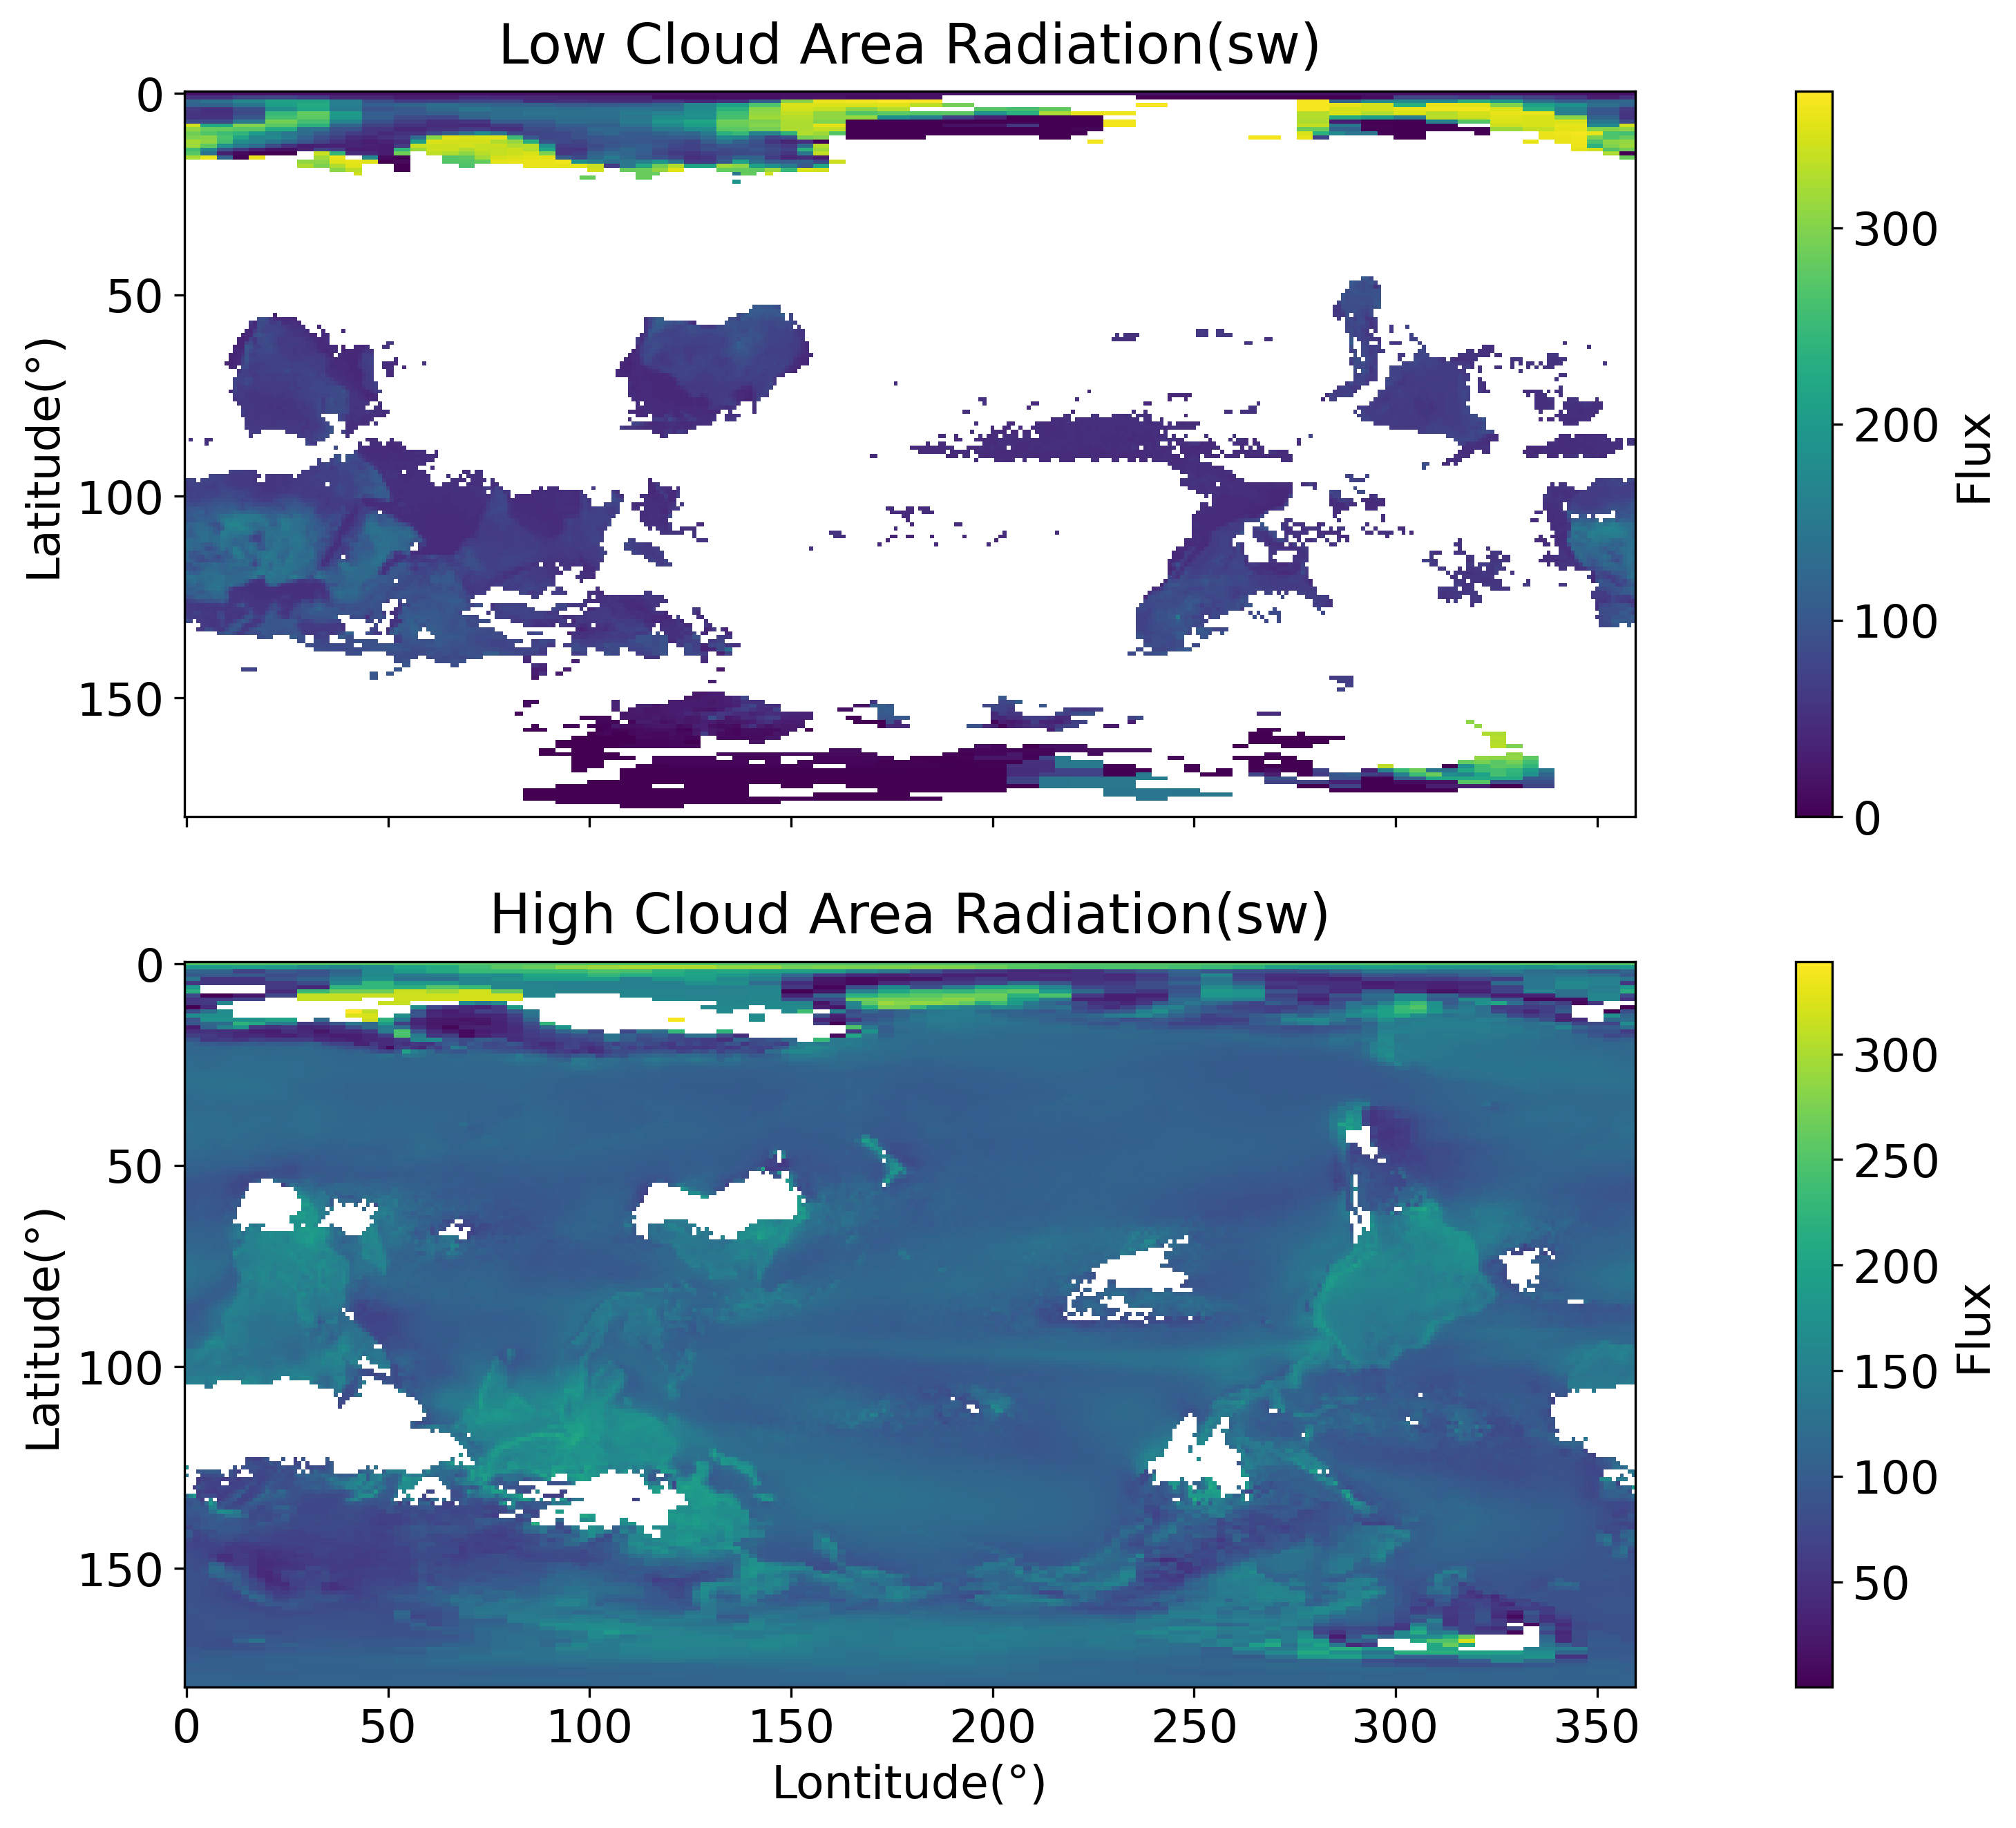

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

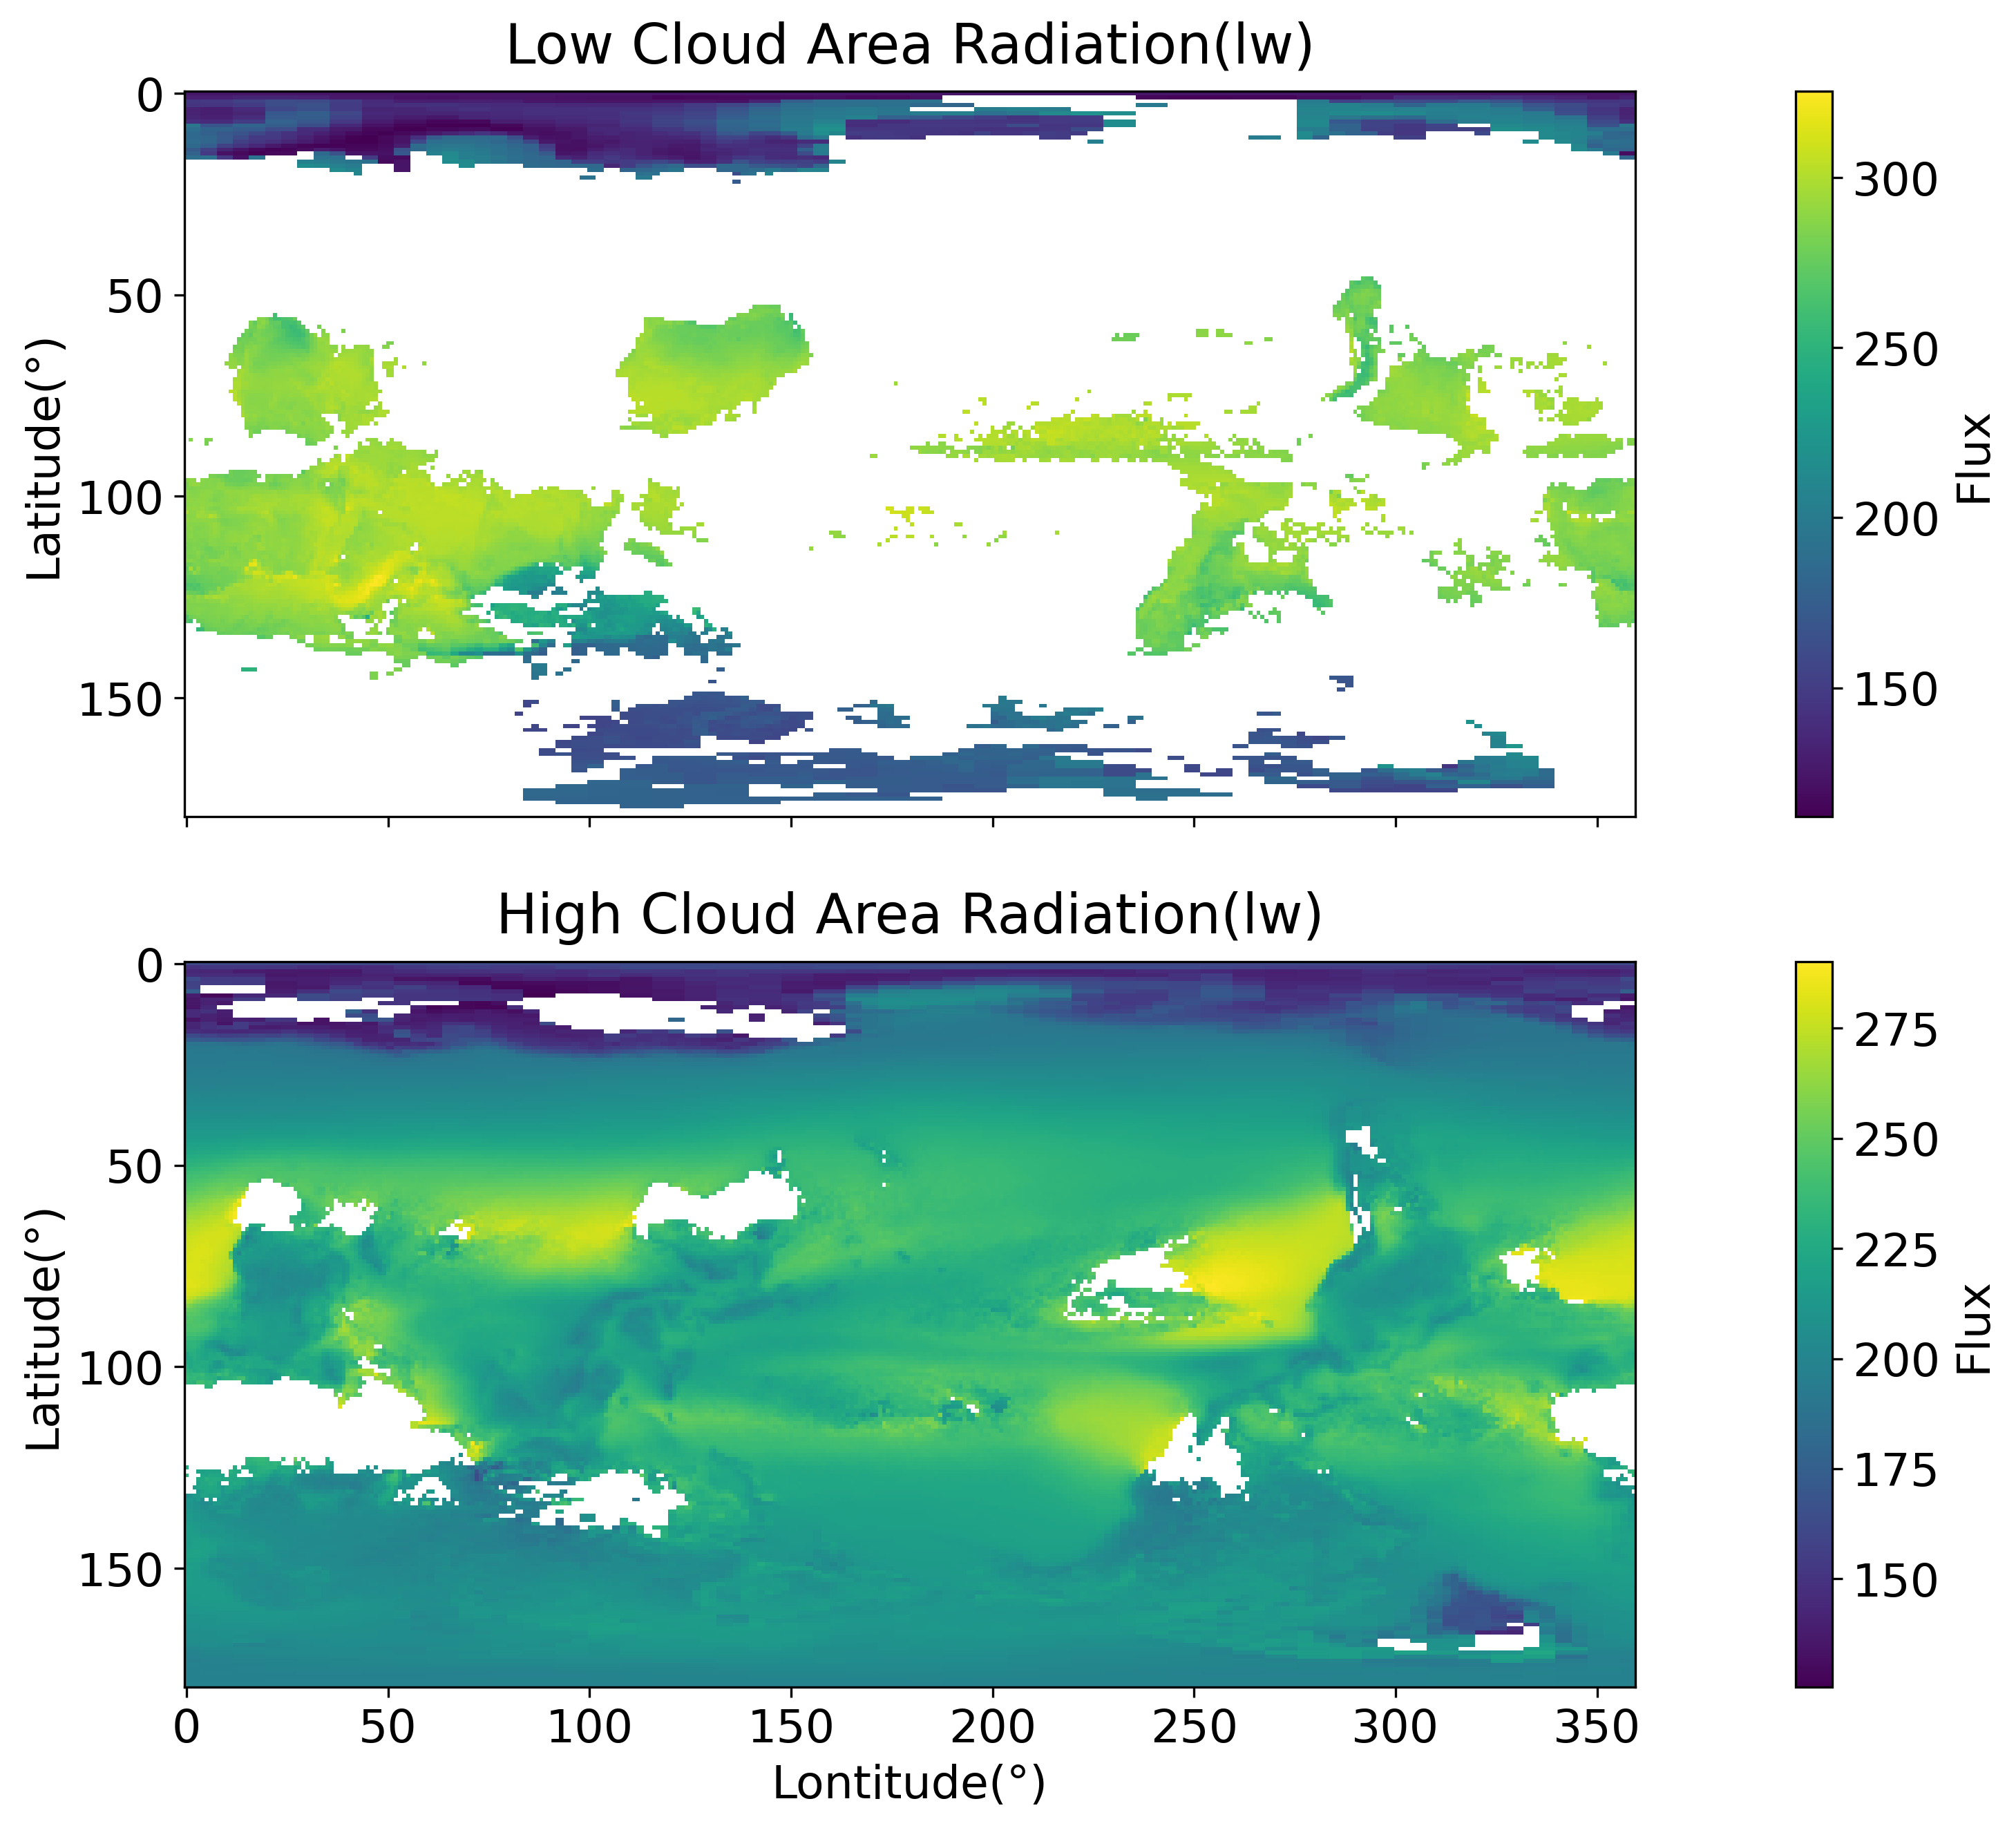

In [14]:
#2.4 
cloud_area=ear_ener_budg.cldarea_total_daynight_mon
# 低云量和高云量区域的短波辐射
low_cloud_radiation_sw=ear_ener_budg.toa_sw_all_mon.where(cloud_area<25).mean(dim='time')
high_cloud_radiation_sw=ear_ener_budg.toa_sw_all_mon.where(cloud_area>75).mean(dim='time')
fig_24_1,ax_24_1=plt.subplots(2,1,figsize=(20, 10),dpi=300,sharex=True)
# 低云量区域短波辐射
plt.subplot(2, 1, 1)
plt.imshow(low_cloud_radiation_sw)
plt.title('Low Cloud Area Radiation(sw)',pad=10)
cbar24_1_1=plt.colorbar()
cbar24_1_1.set_label('Flux')
plt.ylabel('Latitude(°)')
# 高云量区域短波辐射
plt.subplot(2, 1, 2)
plt.imshow(high_cloud_radiation_sw)
plt.title('High Cloud Area Radiation(sw)',pad=10)
cbar24_1_2=plt.colorbar()
cbar24_1_2.set_label('Flux')
plt.xlabel('Lontitude(°)')
plt.ylabel('Latitude(°)')
#低云量和高云量区域的长波辐射
low_cloud_radiation_lw=ear_ener_budg.toa_lw_all_mon.where(cloud_area<25).mean(dim='time')
high_cloud_radiation_lw=ear_ener_budg.toa_lw_all_mon.where(cloud_area>75).mean(dim='time')
fig_24_2,ax_24_2=plt.subplots(2,1,figsize=(20, 10),dpi=300,sharex=True)
# 低云量区域长波辐射
plt.subplot(2, 1, 1)
plt.imshow(low_cloud_radiation_lw)
plt.title('Low Cloud Area Radiation(lw)',pad=10)
cbar24_2_1=plt.colorbar()
cbar24_2_1.set_label('Flux')
plt.ylabel('Latitude(°)')
# 高云量区域长波辐射
plt.subplot(2, 1, 2)
plt.imshow(high_cloud_radiation_lw)
plt.title('High Cloud Area Radiation(lw)',pad=10)
cbar24_2_2=plt.colorbar()
cbar24_2_2.set_label('Flux')
plt.xlabel('Lontitude(°)')
plt.ylabel('Latitude(°)')

In [15]:
#2.5
# 从数据集中得知toa_cre_sw_mon, toa_cre_lw_mon, 和 toa_cre_net_mon 分别代表短波、长波和净辐射的云辐射效应（CRE，Cloud Radiative Effect），即云层对辐射平衡的影响。
#高云区和低云区的短波辐射全球平均值
unit_low_cld_sw=ear_ener_budg.toa_sw_all_mon.where(cloud_area<25).mean(dim='time')*unit_area
globalmean_low_cld_sw=unit_low_cld_sw.sum(dim=['lat', 'lon'])/earth_area
unit_high_cld_sw=ear_ener_budg.toa_sw_all_mon.where(cloud_area>75).mean(dim='time')*unit_area
globalmean_high_cld_sw=unit_high_cld_sw.sum(dim=['lat', 'lon'])/earth_area
print('Global mean values of shortwave in low cloud regions:',float(globalmean_low_cld_sw) , 'W/m^2')
print('Global mean values of shortwave in high cloud regions:',float(globalmean_high_cld_sw), 'W/m^2' )
#高云区和低云区的长波辐射全球平均值
unit_low_cld_lw=ear_ener_budg.toa_lw_all_mon.where(cloud_area<25).mean(dim='time')*unit_area
globalmean_low_cld_lw=unit_low_cld_lw.sum(dim=['lat', 'lon'])/earth_area
unit_high_cld_lw=ear_ener_budg.toa_lw_all_mon.where(cloud_area>75).mean(dim='time')*unit_area
globalmean_high_cld_lw=unit_high_cld_lw.sum(dim=['lat', 'lon'])/earth_area
print('Global mean values of longwave in low cloud regions:',float(globalmean_low_cld_lw), 'W/m^2' )
print('Global mean values of longwave in high cloud regions:',float(globalmean_high_cld_lw) , 'W/m^2')


Global mean values of shortwave in low cloud regions: 15.471146583557129 W/m^2
Global mean values of shortwave in high cloud regions: 106.16401672363281 W/m^2
Global mean values of longwave in low cloud regions: 57.25401306152344 W/m^2
Global mean values of longwave in high cloud regions: 214.81924438476562 W/m^2


In [16]:
unit_cre_sw=ear_ener_budg.toa_cre_sw_mon.mean(dim='time')*unit_area
overall_cre_sw=unit_cre_sw.sum(dim=['lat','lon'])/earth_area
print('Overall effect of clouds on shortwave:',float(overall_cre_sw),'W/m^2')
unit_cre_lw=ear_ener_budg.toa_cre_lw_mon.mean(dim='time')*unit_area
overall_cre_lw=unit_cre_lw.sum(dim=['lat','lon'])/earth_area
print('Overall effect of clouds on longwave:',float(overall_cre_lw),'W/m^2')

Overall effect of clouds on shortwave: -46.78656768798828 W/m^2
Overall effect of clouds on longwave: 27.956222534179688 W/m^2


### 第二题代码运行正常，可以输出正确结果，报告中也展示了输出内容和详细的结果的分析。代码整洁思路清晰。

### 得分：31/30
### --------------------------------------------------------------------------------------------

## 3. Explore a netCDF dataset

In [15]:
#第三大题
'''
#尝试将下载的文件拼成一个文件
import glob
import xarray as xr
folder_path='D:/ESE5023/assignment/ESE5023_Assignments_12332312/ESE5023_Assignments_12332312/assignment3/try/try2' 
nc4_files=glob.glob(f'{folder_path}/*.nc4')
# 读取文件夹里所有.nc4文件
datasets=[xr.open_dataset(file) for file in nc4_files]
combined_dataset=xr.concat(datasets, dim='time')
combined_dataset.to_netcdf('D:/ESE5023/assignment/ESE5023_Assignments_12332312/ESE5023_Assignments_12332312/assignment3/try/try2/combined_dataset2.nc4')
'''

"\n#尝试将下载的文件拼成一个文件\nimport glob\nimport xarray as xr\nfolder_path='D:/ESE5023/assignment/ESE5023_Assignments_12332312/ESE5023_Assignments_12332312/assignment3/try/try2' \nnc4_files=glob.glob(f'{folder_path}/*.nc4')\n# 读取文件夹里所有.nc4文件\ndatasets=[xr.open_dataset(file) for file in nc4_files]\ncombined_dataset=xr.concat(datasets, dim='time')\ncombined_dataset.to_netcdf('D:/ESE5023/assignment/ESE5023_Assignments_12332312/ESE5023_Assignments_12332312/assignment3/try/try2/combined_dataset2.nc4')\n"

In [17]:
combined_dataset2=xr.open_dataset("combined_dataset2.nc4",engine="netcdf4")
combined_dataset2

<xarray.Dataset>
Dimensions:         (lon: 576, lat: 361, time: 36)
Coordinates:
  * lon             (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat             (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time            (time) datetime64[ns] 1980-01-01T00:30:00 ... 1982-12-01T...
Data variables: (12/42)
    EFLUXICE        (time, lat, lon) float32 ...
    EFLUXWTR        (time, lat, lon) float32 ...
    FRSEAICE        (time, lat, lon) float32 ...
    HFLUXICE        (time, lat, lon) float32 ...
    HFLUXWTR        (time, lat, lon) float32 ...
    LWGNTICE        (time, lat, lon) float32 ...
    ...              ...
    Var_TAUYICE     (time, lat, lon) float32 ...
    Var_TAUYWTR     (time, lat, lon) float32 ...
    Var_TSKINICE    (time, lat, lon) float32 ...
    Var_TSKINWTR    (time, lat, lon) float32 ...
    Var_U10M        (time, lat, lon) float32 ...
    Var_V10M        (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Fri May  8 00...
    Filename:                          MERRA2_100.tavgM_2d_ocn_Nx.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    DataResolution:                    0.5 x 0.625
    Source:                            CVS tag: GEOSadas-5_12_4
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/4IASLIDL8EEC
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

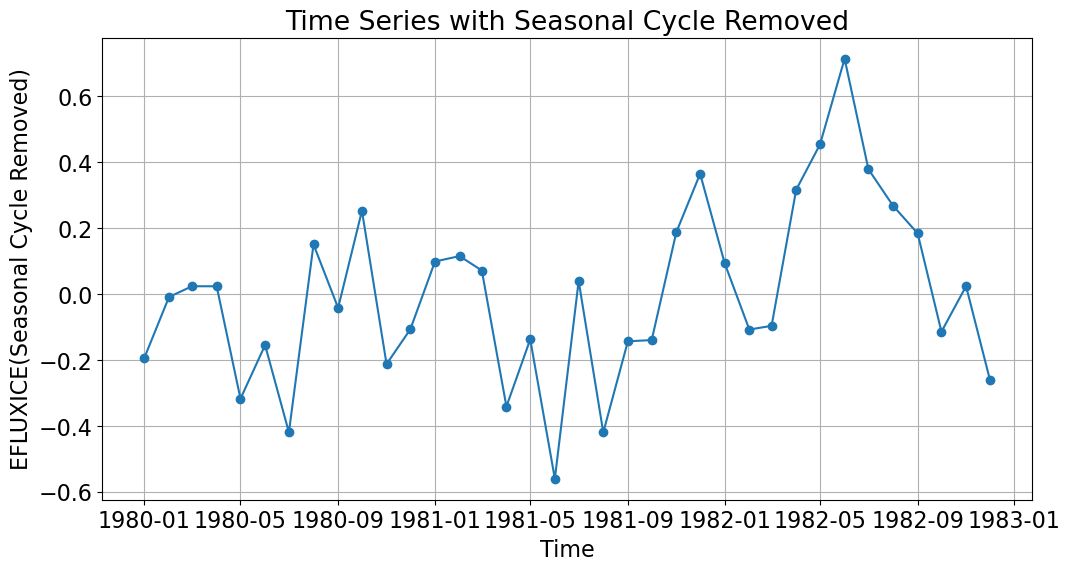

In [18]:
#3.1
# 选择变量'EFLUXICE'，提取时间序列并计算全球的平均值
time_index=combined_dataset2['EFLUXICE'].mean(dim=['lat', 'lon'])
# 将时间序列转换为DataFrame，以便后续处理
time_index_df=time_index.to_dataframe().reset_index()
# 提取月份并计算月份的均值
time_index_df['month']=time_index_df['time'].dt.month
monthly_avg=time_index_df.groupby('month').mean()
# 移除季节性周期
time_index_df['adjusted']=time_index_df.apply(lambda rows: rows['EFLUXICE']-monthly_avg.loc[rows['month'], 'EFLUXICE'], axis=1) #对每一行进行同样的操作
plt.figure(figsize=(12, 6))
plt.plot(time_index_df['time'], time_index_df['adjusted'],marker='o')
plt.title('Time Series with Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('EFLUXICE(Seasonal Cycle Removed)')
plt.grid(True)
plt.show()

In [20]:
time_index_df

,time,EFLUXICE,month,adjusted
0,1980-01-01 00:30:00,4.385823,1,-0.192658
1,1980-02-01 00:30:00,3.710137,2,-0.008332
2,1980-03-01 00:30:00,3.030320,3,0.024138
3,1980-04-01 00:30:00,2.970901,4,0.023995
4,1980-05-01 00:30:00,3.297411,5,-0.317261
5,1980-06-01 00:30:00,3.118864,6,-0.154598
6,1980-07-01 00:30:00,1.791182,7,-0.419299
7,1980-08-01 00:30:00,2.857079,8,0.150980
8,1980-09-01 00:30:00,2.583882,9,-0.041598
9,1980-10-01 00:30:00,5.510836,10,0.253183


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

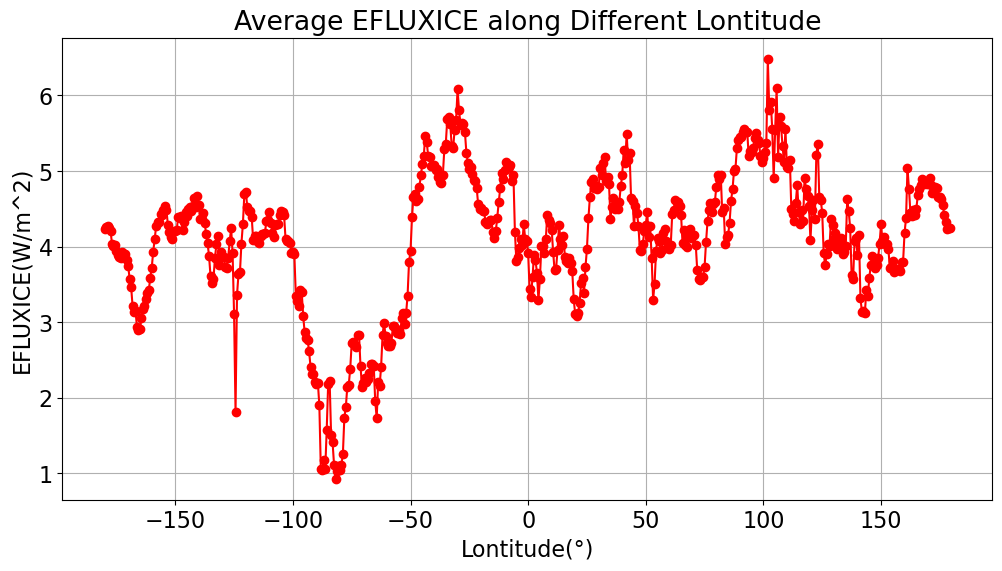

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

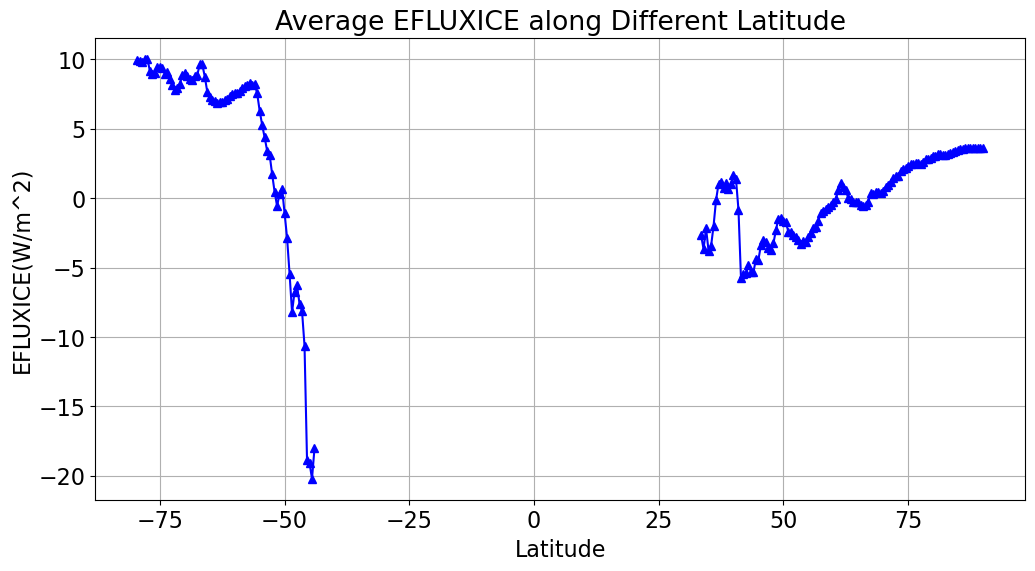

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

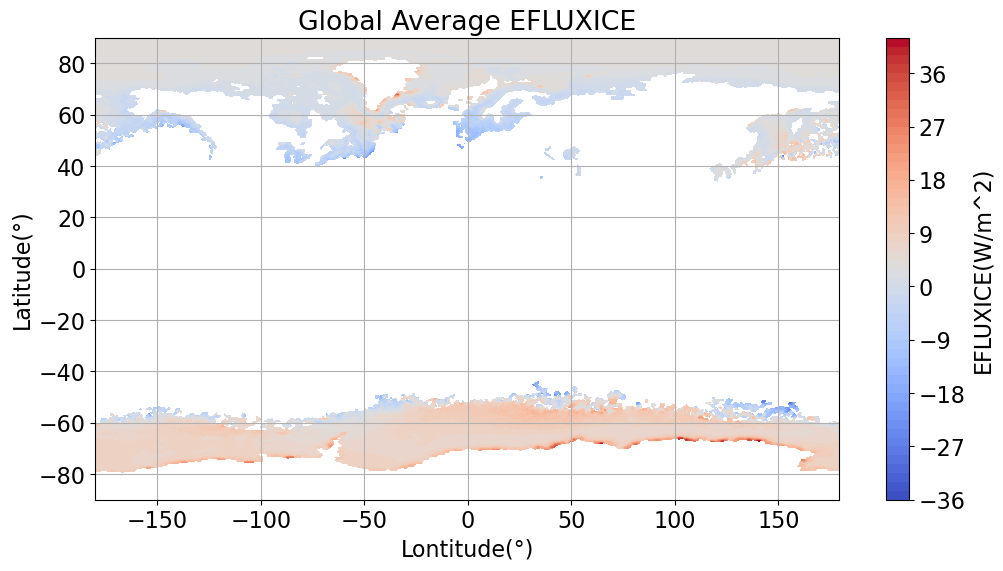

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

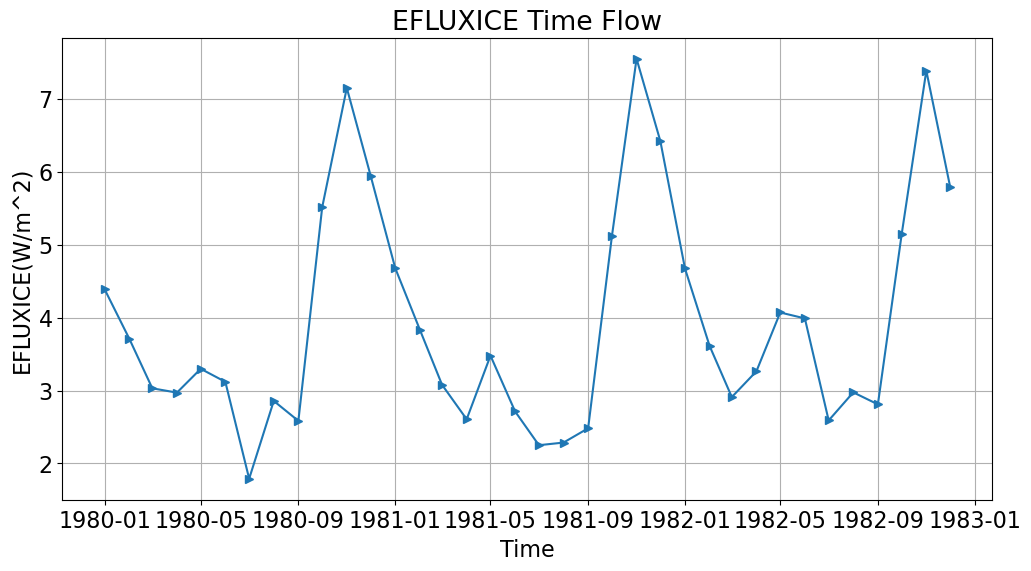

/home/zhangp/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

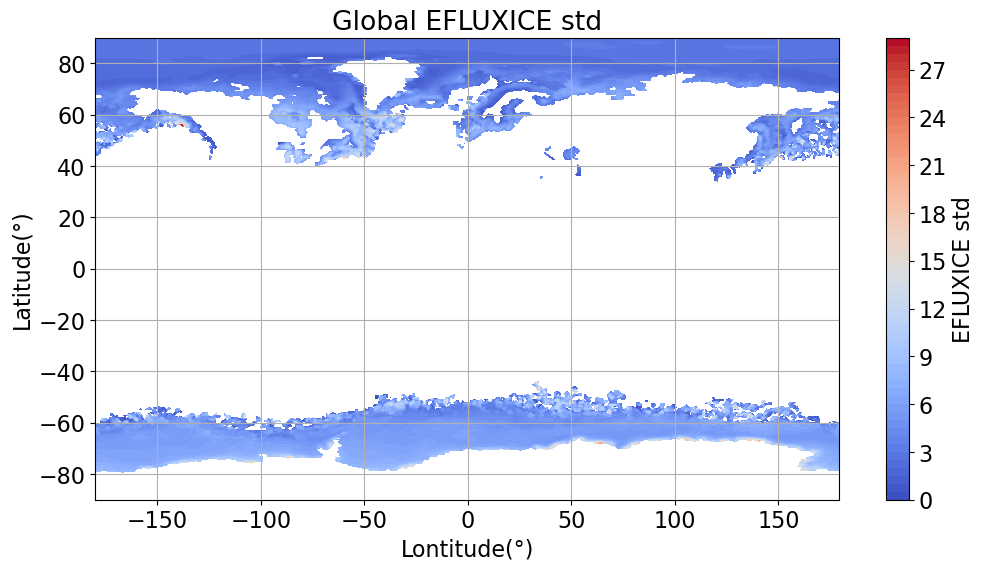

In [21]:
# 3.2
# fig1.EFLUXICE的经度平均图
efluxice_lon_avg=combined_dataset2['EFLUXICE'].mean(dim=['lat', 'time'])
plt.figure(figsize=(12, 6))
plt.plot(efluxice_lon_avg.lon, efluxice_lon_avg, marker='o',color='red')
plt.title('Average EFLUXICE along Different Lontitude')
plt.xlabel('Lontitude(°)')
plt.ylabel('EFLUXICE(W/m^2)')
plt.grid(True)
plt.show()
# fig2.纬度平均EFLUXICE图
efluxice_lat_avg=combined_dataset2['EFLUXICE'].mean(dim=['lon', 'time'])
plt.figure(figsize=(12, 6))
plt.plot(efluxice_lat_avg.lat, efluxice_lat_avg, marker='^',color='blue')
plt.title('Average EFLUXICE along Different Latitude')
plt.xlabel('Latitude')
plt.ylabel('EFLUXICE(W/m^2)')
plt.grid(True)
plt.show()
# fig3.EFLUXICE变化的全球平均图
efluxice_global_avg=combined_dataset2['EFLUXICE'].mean(dim='time')
plt.figure(figsize=(12, 6))
plt.contourf(efluxice_global_avg.lon, efluxice_global_avg.lat, efluxice_global_avg, 60, cmap='coolwarm')
plt.colorbar(label='EFLUXICE(W/m^2)')
plt.title('Global Average EFLUXICE')
plt.xlabel('Lontitude(°)')
plt.ylabel('Latitude(°)')
plt.grid(True)
plt.show()
# fig4.EFLUXICE的时间变化图
efluxice_time_series=combined_dataset2['EFLUXICE'].mean(dim=['lat', 'lon'])
plt.figure(figsize=(12, 6))
plt.plot(efluxice_time_series.time, efluxice_time_series, marker='>')
plt.title('EFLUXICE Time Flow')
plt.xlabel('Time')
plt.ylabel('EFLUXICE(W/m^2)')
plt.grid(True)
plt.show()
# fig5.EFLUXICE标准偏差图
efluxice_std=combined_dataset2['EFLUXICE'].std(dim='time')
plt.figure(figsize=(12, 6))
plt.contourf(efluxice_std.lon, efluxice_std.lat, efluxice_std, 60, cmap='coolwarm')
plt.colorbar(label='EFLUXICE std')
plt.title('Global EFLUXICE std')
plt.xlabel('Lontitude(°)')
plt.ylabel('Latitude(°)')
plt.grid(True)
plt.show()

### 第三题代码运行正常，可以输出正确结果和图片，报告中也展示了输出内容和结果的分析。
### 得分：10/10
### --------------------------------------------------------------------------------------------